# Assessing the risk of IoT enabled Attacks

![Scenario Image](scenario.png)

# To execute cells containing code press Shift+Enter

# Import Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
pd.set_option("display.max_rows", None)

# Open the csv containing the risk information in a Dataframe

In [6]:
risks=pd.read_csv('SmartThermo.csv')

# View the head of the Dataframe

In [7]:
risks.head(20)

,Risk,Impact,Base Score,Base Score-Value,Motive Likelihood,Threat Agent,Attack Vector,Target,1_Hop,2_Hops,3_Hops,4_Hops
0,M,M,C,10.0,L,Disgruntled Healthcare Worker,N,Smart Thermostat,Smart Bed,No Hop,No Hop,No Hop
1,M,M,C,10.0,L,Disgruntled Healthcare Systems Administrator,N,Smart Thermostat,Smart Bed,No Hop,No Hop,No Hop
2,M,M,C,10.0,L,Nation State (Hospital),N,Smart Thermostat,Smart Bed,No Hop,No Hop,No Hop
3,L,VL,M,4.2,L,Disgruntled Healthcare Systems Administrator,A,Smart Thermostat,Smart lighting system 2,No Hop,No Hop,No Hop
4,L,VL,M,4.2,L,Nation State (Hospital),A,Smart Thermostat,Smart lighting system 2,No Hop,No Hop,No Hop
5,L,VL,M,4.3,L,Disgruntled Healthcare Systems Administrator,A,Smart Thermostat,Light Controller 1,No Hop,No Hop,No Hop
6,L,VL,M,4.3,L,Nation State (Hospital),A,Smart Thermostat,Light Controller 1,No Hop,No Hop,No Hop
7,M,M,C,9.1,L,Disgruntled Healthcare Worker,N,Smart Thermostat,Access Point,No Hop,No Hop,No Hop
8,M,M,C,9.1,L,Disgruntled Healthcare Systems Administrator,N,Smart Thermostat,Access Point,No Hop,No Hop,No Hop
9,M,M,C,9.1,L,Nation State (Hospital),N,Smart Thermostat,Access Point,No Hop,No Hop,No Hop


# Question 1: What types of attack vectors are activated within this dataset?


In [8]:

attack_vectors = risks['Attack Vector'].unique()


print("Activated Attack Vectors:", attack_vectors)


Activated Attack Vectors: ['N' 'A' 'L']


# Question 2: How many instances are there for each type of attack vector (calculate and produce pie chart through matplotlib)

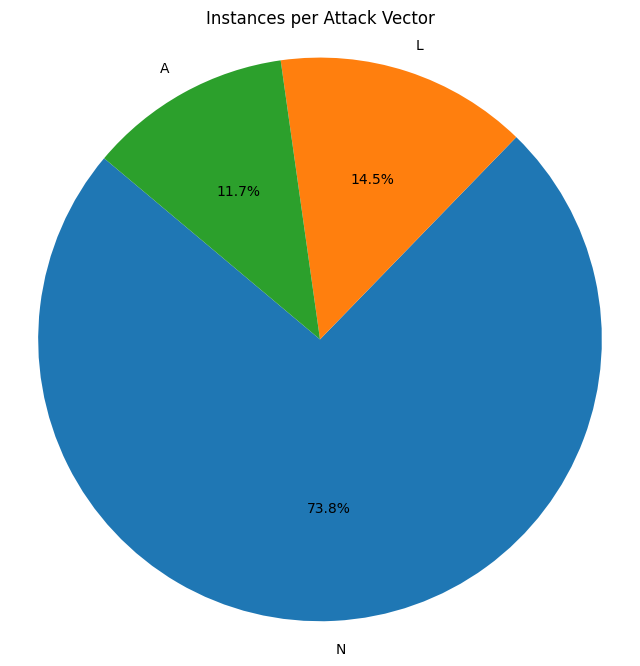

Attack Vector
N    3129
L     614
A     494
Name: count, dtype: int64


In [9]:
import matplotlib.pyplot as plt


attack_vector_counts = risks['Attack Vector'].value_counts()


plt.figure(figsize=(8, 8))
attack_vector_counts.plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Instances per Attack Vector')
plt.ylabel('') 
plt.axis('equal') 
plt.show()


print(attack_vector_counts)


# Question 3: How many High and Very High Risk Attack Paths are produced by each attack vector 

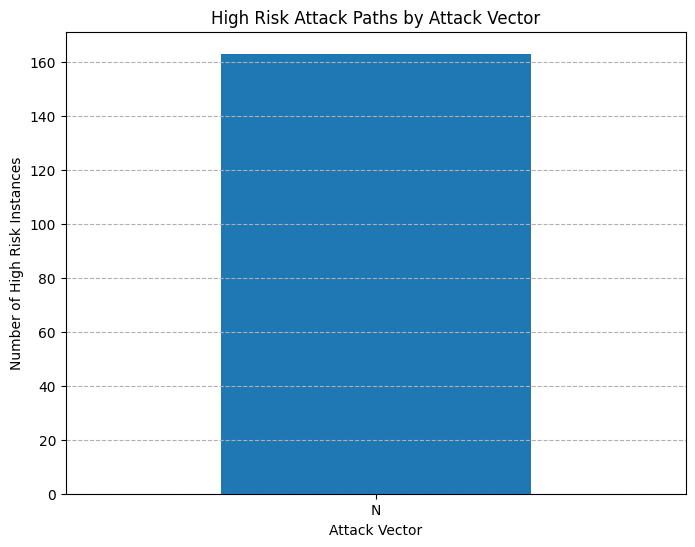

Attack Vector
N    163
Name: count, dtype: int64


In [10]:
import matplotlib.pyplot as plt


high_risk = risks[risks['Risk'] == 'H']


high_risk_counts = high_risk['Attack Vector'].value_counts()


plt.figure(figsize=(8, 6))
high_risk_counts.plot(kind='bar', rot=0)
plt.title('High Risk Attack Paths by Attack Vector')
plt.xlabel('Attack Vector')
plt.ylabel('Number of High Risk Instances')
plt.grid(axis='y', linestyle='--')
plt.show()


print(high_risk_counts)


# Question 4: Which threat agents are active against this infrastructure?

In [11]:

active_threat_agents = risks['Threat Agent'].unique()


print("Active Threat Agents:")
for agent in active_threat_agents:
    print("-", agent)


Active Threat Agents:
- Disgruntled Healthcare Worker
- Disgruntled Healthcare Systems Administrator
- Nation State (Hospital)
- Cyber Terrorist
- Business Competitor
- Cyber Criminal Group(Hospital)
- Healthcare Rights Activist


# Question 5: Which threat agents activate high and very high risk attack paths(produce count per profile)

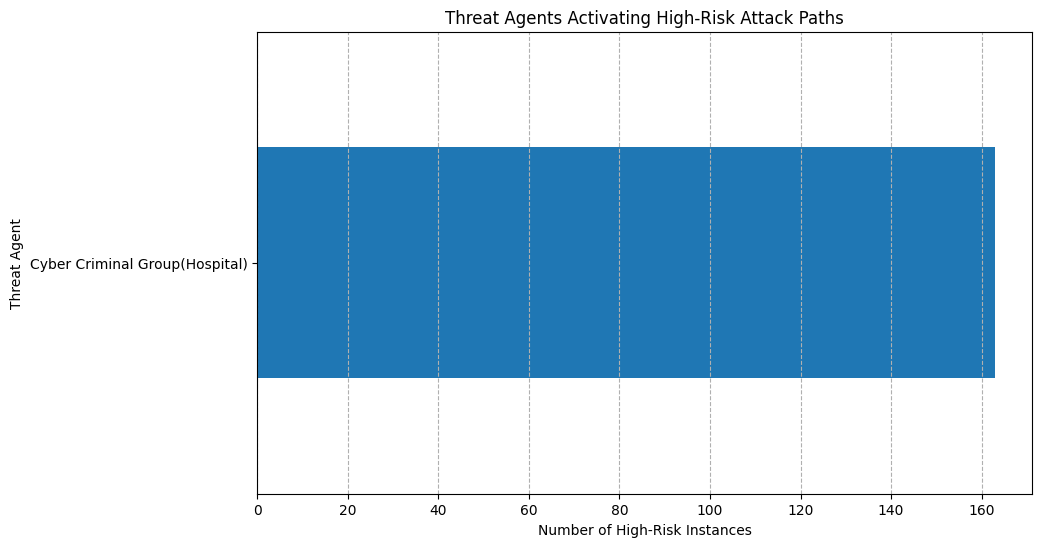

Threat Agent
Cyber Criminal Group(Hospital)    163
Name: count, dtype: int64


In [12]:
import matplotlib.pyplot as plt


high_risk = risks[risks['Risk'] == 'H']


high_risk_threat_agents = high_risk['Threat Agent'].value_counts()


plt.figure(figsize=(10, 6))
high_risk_threat_agents.plot(kind='barh')
plt.title('Threat Agents Activating High-Risk Attack Paths')
plt.xlabel('Number of High-Risk Instances')
plt.ylabel('Threat Agent')
plt.grid(axis='x', linestyle='--')
plt.show()


print(high_risk_threat_agents)


# Question 6:How many instances are there for each unique string of the motive-likelihood attribute (Calculate and produce pie chart through matplotlib)?

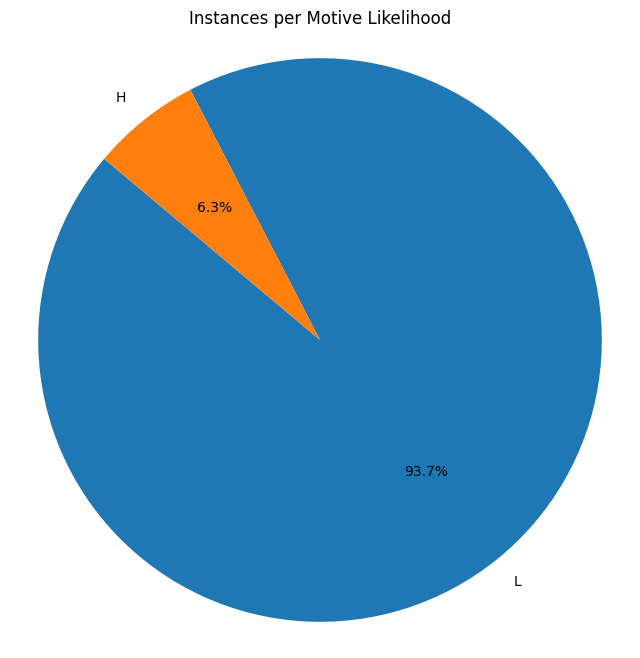

Motive Likelihood
L    3971
H     266
Name: count, dtype: int64


In [13]:
import matplotlib.pyplot as plt


motive_likelihood_counts = risks['Motive Likelihood'].value_counts()


plt.figure(figsize=(8, 8))
motive_likelihood_counts.plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Instances per Motive Likelihood')
plt.ylabel('')  
plt.axis('equal') 
plt.show()


print(motive_likelihood_counts)


# Question 7:Calculate which devices are stepping stones of high or very high risk attack paths when they act as the intermediate (1-hop column) node of 2 hop attack paths(3 hops column is NaN); produce count per device id.

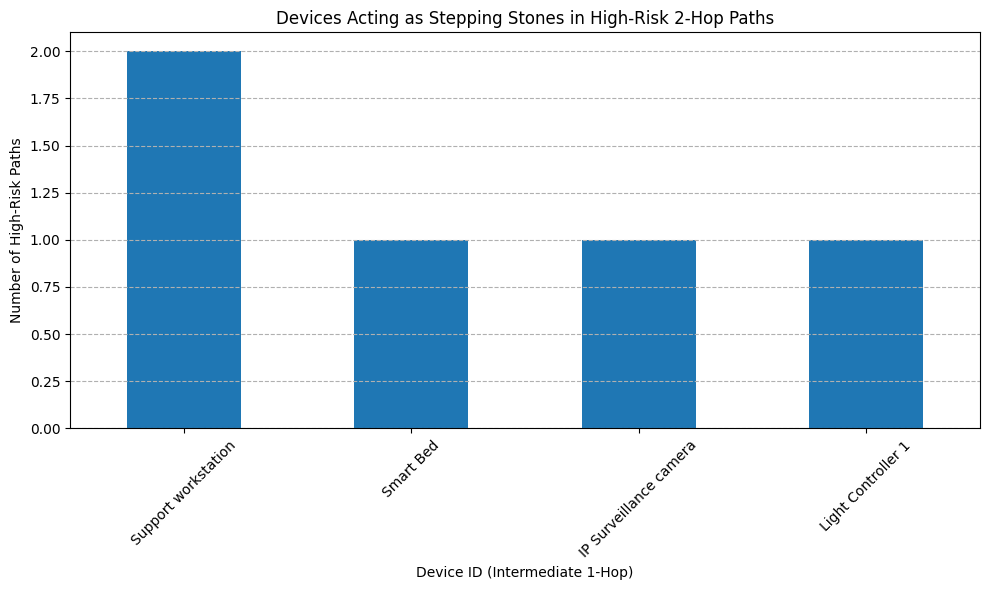

1_Hop
Support workstation       2
Smart Bed                 1
IP Surveillance camera    1
Light Controller 1        1
Name: count, dtype: int64


In [14]:
import matplotlib.pyplot as plt


two_hop_high_risk = risks[(risks['Risk'] == 'H') & 
                          (risks['2_Hops'] != 'No Hop') & 
                          (risks['3_Hops'] == 'No Hop')]


stepping_stone_counts = two_hop_high_risk['1_Hop'].value_counts()


if stepping_stone_counts.empty:
    print("No devices acting as stepping stones in 2-hop high-risk attack paths.")
else:

    plt.figure(figsize=(10, 6))
    stepping_stone_counts.plot(kind='bar')
    plt.title('Devices Acting as Stepping Stones in High-Risk 2-Hop Paths')
    plt.xlabel('Device ID (Intermediate 1-Hop)')
    plt.ylabel('Number of High-Risk Paths')
    plt.grid(axis='y', linestyle='--')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


    print(stepping_stone_counts)


# Calculate which devices are stepping stones of high or very high risk attack paths when they act as the intermediate (1-hop column & 2 hop column) node of 3 hop attack paths; produce count per device id.

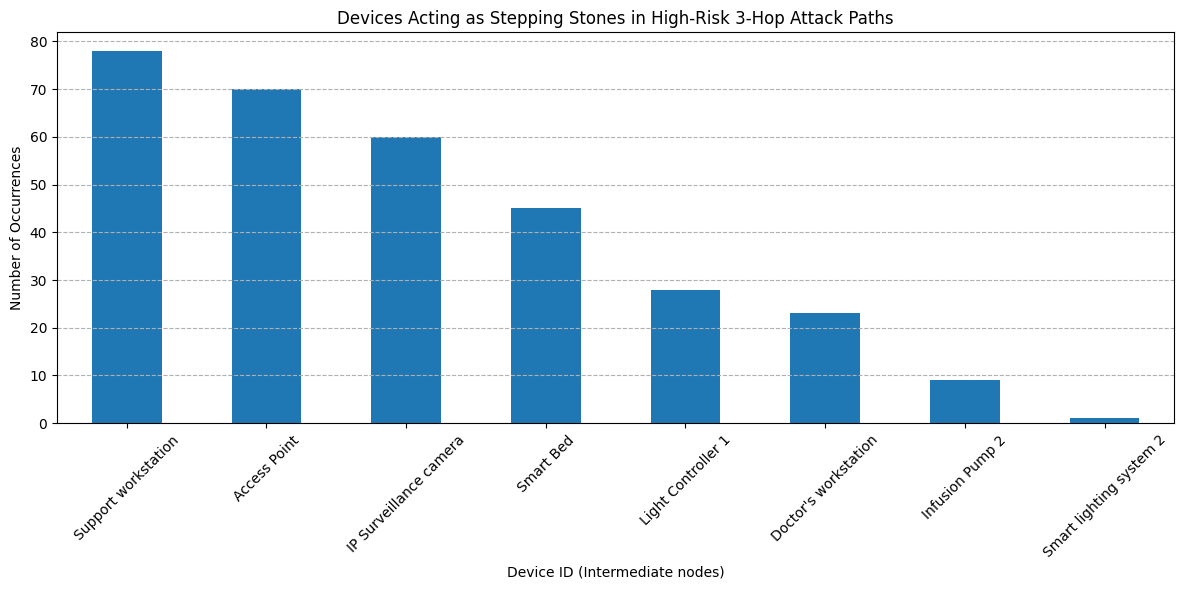

Support workstation        78
Access Point               70
IP Surveillance camera     60
Smart Bed                  45
Light Controller 1         28
Doctor's workstation       23
Infusion Pump 2             9
Smart lighting system 2     1
Name: count, dtype: int64


In [26]:
import matplotlib.pyplot as plt
import pandas as pd


three_hop_high_risk = risks[(risks['Risk'] == 'H') & 
                            (risks['3_Hops'] != 'No Hop')]


stepping_stones_counts = pd.concat([
    three_hop_high_risk['1_Hop'], 
    three_hop_high_risk['2_Hops']
]).value_counts()


plt.figure(figsize=(12, 6))
stepping_stones_counts.plot(kind='bar')
plt.title('Devices Acting as Stepping Stones in High-Risk 3-Hop Attack Paths')
plt.xlabel('Device ID (Intermediate nodes)')
plt.ylabel('Number of Occurrences')
plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


print(stepping_stones_counts)


# Question 9:What's the most common entry point for:

# Question 9.1: 1 hop attack paths (2 hops & 3 hops columns are NaN, 1 hop column is the entry point)


In [21]:

one_hop_entries = risks[(risks['1_Hop'] != 'No Hop') & 
                        (risks['2_Hops'] == 'No Hop') & 
                        (risks['3_Hops'] == 'No Hop')]


entry_point_counts_1 = one_hop_entries['1_Hop'].value_counts()


if entry_point_counts_1.empty:
    print("No 1-hop attack paths found in the dataset.")
else:

    print("Most common entry points for 1-hop attacks:")
    print(entry_point_counts_1)


Most common entry points for 1-hop attacks:
1_Hop
Support workstation        8
Light Controller 1         4
Access Point               3
Smart Bed                  3
IP Surveillance camera     3
Smart lighting system 2    2
Name: count, dtype: int64


# Question 9.2: 2  hop attack paths (3 hops column is NaN, 2 hops column is the entry point)


In [22]:

two_hop_entries = risks[(risks['2_Hops'] != 'No Hop') & 
                        (risks['3_Hops'] == 'No Hop')]


entry_point_counts_2 = two_hop_entries['2_Hops'].value_counts()


if entry_point_counts_2.empty:
    print("No 2-hop attack paths found in the dataset.")
else:

    print("Most common entry points for 2-hop attacks:")
    print(entry_point_counts_2)


Most common entry points for 2-hop attacks:
2_Hops
Doctor's workstation       32
Hospital main router       30
IP Surveillance camera     18
Access Point               18
Light Controller 1         12
Support workstation        12
Smart Bed                   6
Smart lighting system 2     4
Name: count, dtype: int64


# Question 9.3: 3 hop attack paths (3 hops column is the entry point)

In [23]:

three_hop_entries = risks[(risks['3_Hops'] != 'No Hop') & 
                        (risks['4_Hops'] == 'No Hop')]


entry_point_counts_3 = three_hop_entries['3_Hops'].value_counts()


print("Most common entry points for 3-hop attacks:")
print(entry_point_counts_3)


Most common entry points for 3-hop attacks:
3_Hops
Hospital main router       144
Doctor's workstation       136
Access Point               108
IP Surveillance camera      90
Light Controller 1          64
Support workstation         60
Smart Bed                   48
Smart lighting system 2     12
Name: count, dtype: int64


# Question 9.4: 4 hop attack paths (4 hops column is the entry point)

In [25]:

four_hop_entries = risks[risks['4_Hops'] != 'No Hop']


entry_point_counts_4 = four_hop_entries['4_Hops'].value_counts()


print("Most common entry points for 4-hop attacks:")
print(entry_point_counts_4)


Most common entry points for 4-hop attacks:
4_Hops
Hospital main router       750
Doctor's workstation       720
Access Point               534
IP Surveillance camera     477
Light Controller 1         336
Support workstation        318
Smart Bed                  225
Smart lighting system 2     60
Name: count, dtype: int64


# Question 9.5: Overall

Corrected Overall Most Common Entry Points:
Entry_Point
Hospital main router       924
Doctor's workstation       888
Access Point               663
IP Surveillance camera     588
Light Controller 1         416
Support workstation        398
Smart Bed                  282
Smart lighting system 2     78
Name: count, dtype: int64


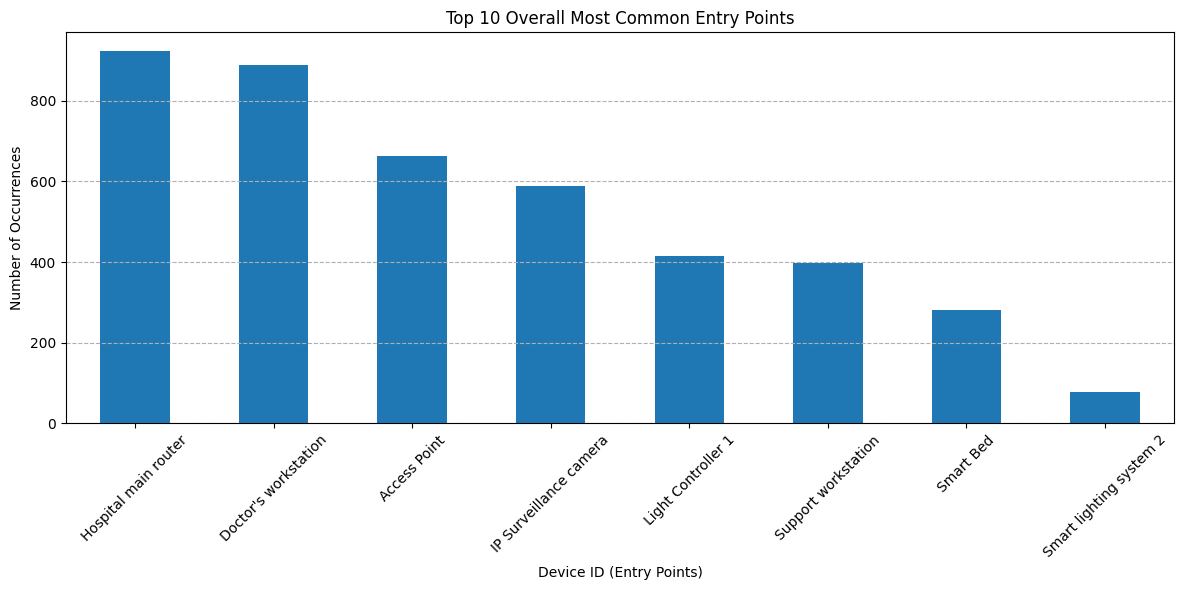

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to find the last valid hop (entry point)
def get_entry_point(row):
    for col in ['4_Hops', '3_Hops', '2_Hops', '1_Hop']:
        hop = row[col]
        if pd.notna(hop) and hop != 'No Hop':
            return hop
    return None  # if no valid entry found

# Apply function to dataset to find entry points
risks['Entry_Point'] = risks.apply(get_entry_point, axis=1)

# Count the occurrences of each entry point
overall_entry_counts = risks['Entry_Point'].value_counts()

# Display the most common overall entry points
print("Corrected Overall Most Common Entry Points:")
print(overall_entry_counts)

# Visualization of overall top 10 entry points
plt.figure(figsize=(12, 6))
overall_entry_counts.head(10).plot(kind='bar')
plt.title('Top 10 Overall Most Common Entry Points')
plt.xlabel('Device ID (Entry Points)')
plt.ylabel('Number of Occurrences')
plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Question 10: Which assets are the most important to secure? Compose a short 1-2 page report containing insights from your analysis that will explain which nodes lead to the highest amount of attack paths and in what way.

Τα σημαντικότερα στοιχεία του δικτύου με βάση τη συχνότητα εμπλοκής τους:
IP Surveillance camera     3124
Support workstation        2971
Access Point               2769
Light Controller 1         1886
Smart Bed                  1874
Doctor's workstation       1842
Hospital main router        924
Infusion Pump 2             379
Smart lighting system 2     184
Name: count, dtype: int64


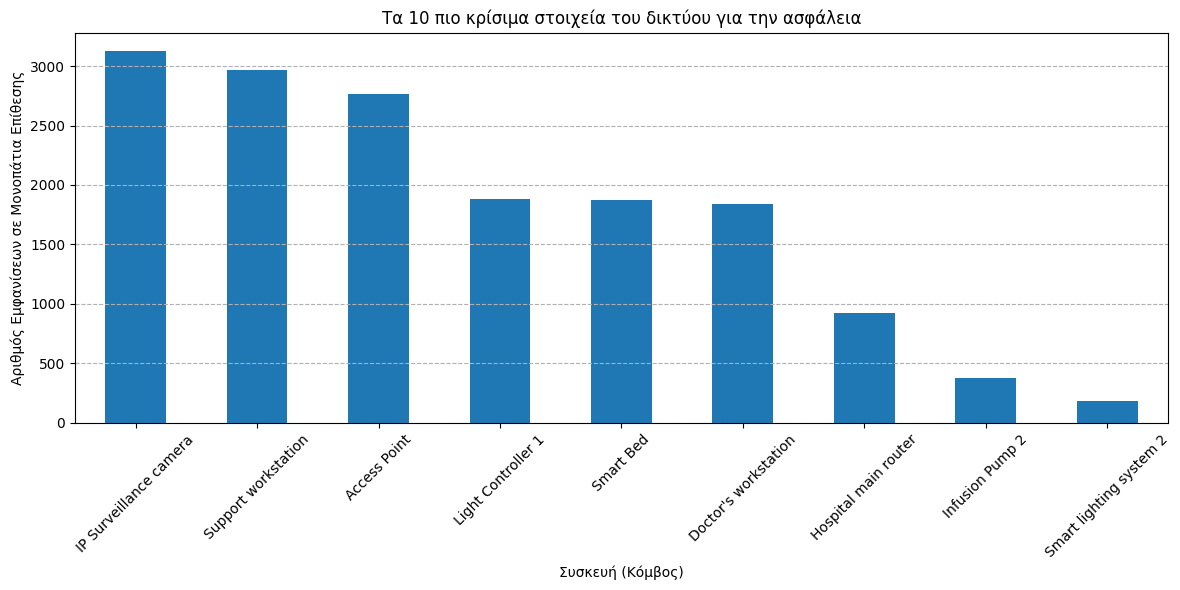

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Συνδυάζουμε όλα τα hops σε μια ενιαία σειρά δεδομένων
all_nodes = pd.concat([
    risks['1_Hop'], risks['2_Hops'], risks['3_Hops'], risks['4_Hops']
])

# Αφαιρούμε τις τιμές NaN και "No Hop"
valid_nodes = all_nodes[(all_nodes.notna()) & (all_nodes != 'No Hop')]

# Μετράμε τη συχνότητα εμφάνισης κάθε συσκευής
node_counts = valid_nodes.value_counts()

# Παρουσίαση των πιο κρίσιμων κόμβων
print("Τα σημαντικότερα στοιχεία του δικτύου με βάση τη συχνότητα εμπλοκής τους:")
print(node_counts)

# Οπτικοποίηση των 10 κορυφαίων στοιχείων
plt.figure(figsize=(12, 6))
node_counts.head(10).plot(kind='bar')
plt.title('Τα 10 πιο κρίσιμα στοιχεία του δικτύου για την ασφάλεια')
plt.xlabel('Συσκευή (Κόμβος)')
plt.ylabel('Αριθμός Εμφανίσεων σε Μονοπάτια Επίθεσης')
plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

